In [ ]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np

Alvin, Esha, Ashley

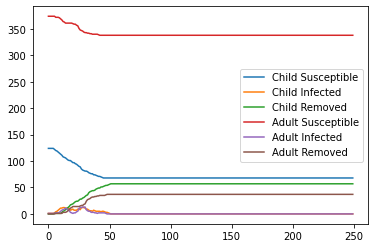

In [ ]:
# Assumptions we make with our model
# All households are the same size
# Vaccines should be 100% effective
# Adults don't interact with children outside of their household

def Model(householdsize, N, VaxFrac, D, p, R_c, R_s, runtime):
  households = [i//householdsize for i in range(N)] # assigns households, where 0 mod 4 is the child in the household
  # print(households)
  status = [0 for i in range(N)] # gives whether a person is S, I or R, 0 is S, 1 is I, 2 is R
  status[0] = 1 # the first kid is infected and nobody else is
  vaccinated = [0 for i in range(N)]
  for i in range(N): # Assigns vaccinations, where 1 is vaccinated and 0 is unvaccinated
    if i%householdsize!=0:
      if (random.uniform(0,1)<VaxFrac):
        vaccinated[i] = 1
  TotalChildren=N//householdsize
  TotalAdults=N-TotalChildren

  dayinfected=[0 for x in range(N)] # tells you how long a person has had the disease

  t_list = []
  child_I_list = []
  child_S_list = []
  child_R_list = []
  adult_S_list = []
  adult_I_list = []
  adult_R_list = []
  #adult_vacc_list = []

  for t in range(runtime):
    newstatus = [0 for i in range(N)]
    for i in range(N): # change I -> R
      if (status[i]==1 and dayinfected[i]==5):
        newstatus[i]=2 # change to removed
      elif (status[i]==1):
        dayinfected[i]+=1 # otherwise, add 1 day to the number of days a person has had disease
        newstatus[i]=1
      if (status[i]==2):
        newstatus[i]=2
    for i in range(N): # change S -> I
      for j in range(i+1,N):
        if (status[i] == 1 and status[j] == 0):
          if (households[i]==households[j]): # if they are in the same household
            if (random.uniform(0,1)<p and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[j] = 1
          elif (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[j] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[j] = 1
        if (status[i] == 0 and status[j] == 1):
          if (households[i]==households[j]): # if they are in the same household
            if (random.uniform(0,1)<p and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[i] = 1
          elif (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[i] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[i] = 1
    count_child_S=0
    count_child_I=0
    count_child_R=0
    count_adult_S=0
    count_adult_I=0
    count_adult_R=0
    #adult_vacc=0

    for i in range(N):
      if (newstatus[i] == 0):
        if i%householdsize==0:
          count_child_S+=1
        else:
          count_adult_S+=1
      elif (newstatus[i] == 1):
        if i%householdsize==0:
          count_child_I+=1
        else:
          count_adult_I+=1
      elif (newstatus[i] == 2):
        if i%householdsize==0:
          count_child_R+=1
        else:
          count_adult_R+=1
      #if (vaccinated[i] == 1):
        #adult_vacc +=1

    child_I_list.append(count_child_I)
    child_S_list.append(count_child_S)
    child_R_list.append(count_child_R)
    adult_S_list.append(count_adult_S)
    adult_I_list.append(count_adult_I)
    adult_R_list.append(count_adult_R)
    #adult_vacc_list.append(adult_vacc)
    
    t_list.append(t)
    status = newstatus

  plt.plot(t_list,child_S_list, label='Child Susceptible')
  plt.plot(t_list,child_I_list, label='Child Infected')
  plt.plot(t_list,child_R_list, label='Child Removed')
  plt.plot(t_list,adult_S_list, label='Adult Susceptible')
  plt.plot(t_list,adult_I_list, label='Adult Infected')
  plt.plot(t_list,adult_R_list, label='Adult Removed')
  #plt.plot(t_list,adult_vacc_list, label='Adult Vaccinated')
  plt.legend()
  plt.show()
    



# householdsize, N, vaccination percentage, D, p, R_c, R_s, runtime
Model(4, 500, 0.8, 5, 0.9, 1.5, .9, 250)


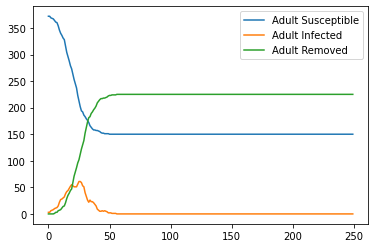

In [ ]:
#Remove children and households

# Assumptions we make with our model
# All households are the same size
# Vaccines should be 100% effective
# Adults don't interact with children outside of their household

def Model(householdsize, N, VaxFrac, D, p, R_c, R_s, runtime):
  households = [0 for i in range(N)] # assigns households, where 0 mod 4 is the child in the household
  # print(households)
  status = [0 for i in range(N)] # gives whether a person is S, I or R, 0 is S, 1 is I, 2 is R
  status[1] = 1 # the first kid is infected and nobody else is
  vaccinated = [0 for i in range(N)]
  for i in range(N): # Assigns vaccinations, where 1 is vaccinated and 0 is unvaccinated
    if i%householdsize!=0:
      if (random.uniform(0,1)<VaxFrac):
        vaccinated[i] = 1
  TotalChildren=N//householdsize
  TotalAdults=N-TotalChildren

  dayinfected=[0 for x in range(N)] # tells you how long a person has had the disease

  t_list = []
  child_I_list = []
  child_S_list = []
  child_R_list = []
  adult_S_list = []
  adult_I_list = []
  adult_R_list = []
  #adult_vacc_list = []

  for t in range(runtime):
    newstatus = [0 for i in range(N)]
    for i in range(N): # change I -> R
      if (status[i]==1 and dayinfected[i]==5):
        newstatus[i]=2 # change to removed
      elif (status[i]==1):
        dayinfected[i]+=1 # otherwise, add 1 day to the number of days a person has had disease
        newstatus[i]=1
      if (status[i]==2):
        newstatus[i]=2
    for i in range(N): # change S -> I
      for j in range(i+1,N):
        if (status[i] == 1 and status[j] == 0):
          if (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[j] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[j] = 1
        if (status[i] == 0 and status[j] == 1):
          if (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[i] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[i] = 1
    count_child_S=0
    count_child_I=0
    count_child_R=0
    count_adult_S=0
    count_adult_I=0
    count_adult_R=0
    #adult_vacc=0

    for i in range(N):
      if (newstatus[i] == 0):
        if i%householdsize==0:
          count_child_S+=1
        else:
          count_adult_S+=1
      elif (newstatus[i] == 1):
        if i%householdsize==0:
          count_child_I+=1
        else:
          count_adult_I+=1
      elif (newstatus[i] == 2):
        if i%householdsize==0:
          count_child_R+=1
        else:
          count_adult_R+=1
      #if (vaccinated[i] == 1):
        #adult_vacc +=1

    child_I_list.append(count_child_I)
    child_S_list.append(count_child_S)
    child_R_list.append(count_child_R)
    adult_S_list.append(count_adult_S)
    adult_I_list.append(count_adult_I)
    adult_R_list.append(count_adult_R)
    #adult_vacc_list.append(adult_vacc)
    
    t_list.append(t)
    status = newstatus

  #plt.plot(t_list,child_S_list, label='Child Susceptible')
  #plt.plot(t_list,child_I_list, label='Child Infected')
  #plt.plot(t_list,child_R_list, label='Child Removed')
  plt.plot(t_list,adult_S_list, label='Adult Susceptible')
  plt.plot(t_list,adult_I_list, label='Adult Infected')
  plt.plot(t_list,adult_R_list, label='Adult Removed')
  #plt.plot(t_list,adult_vacc_list, label='Adult Vaccinated')
  plt.legend()
  plt.show()
    



# householdsize, N, vaccination percentage, D, p, R_c, R_s, runtime
Model(4, 500, 0, 5, 0.9, 1.5, 1.5, 250)


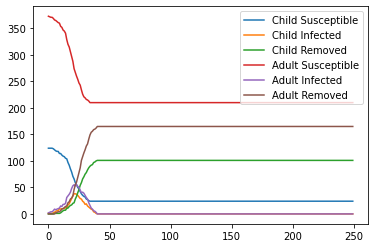

In [ ]:
#Remove school and community transmission

# Assumptions we make with our model
# All households are the same size
# Vaccines should be 100% effective
# Adults don't interact with children outside of their household

def Model(householdsize, N, VaxFrac, D, p, R_c, R_s, runtime):
  households = [i//householdsize for i in range(N)] # assigns households, where 0 mod 4 is the child in the household
  # print(households)
  status = [0 for i in range(N)] # gives whether a person is S, I or R, 0 is S, 1 is I, 2 is R
  status[0] = 1 # the first kid is infected and nobody else is
  vaccinated = [0 for i in range(N)]
  for i in range(N): # Assigns vaccinations, where 1 is vaccinated and 0 is unvaccinated
    if i%householdsize!=0:
      if (random.uniform(0,1)<VaxFrac):
        vaccinated[i] = 1
  TotalChildren=N//householdsize
  TotalAdults=N-TotalChildren

  dayinfected=[0 for x in range(N)] # tells you how long a person has had the disease

  t_list = []
  child_I_list = []
  child_S_list = []
  child_R_list = []
  adult_S_list = []
  adult_I_list = []
  adult_R_list = []
  #adult_vacc_list = []

  for t in range(runtime):
    newstatus = [0 for i in range(N)]
    for i in range(N): # change I -> R
      if (status[i]==1 and dayinfected[i]==5):
        newstatus[i]=2 # change to removed
      elif (status[i]==1):
        dayinfected[i]+=1 # otherwise, add 1 day to the number of days a person has had disease
        newstatus[i]=1
      if (status[i]==2):
        newstatus[i]=2
    for i in range(N): # change S -> I
      for j in range(i+1,N):
        if (status[i] == 1 and status[j] == 0):
          if (households[i]==households[j]): # if they are in the same household
            if (random.uniform(0,1)<p and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[j] = 1
          elif (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[j] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[j] = 1
        if (status[i] == 0 and status[j] == 1):
          if (households[i]==households[j]): # if they are in the same household
            if (random.uniform(0,1)<p and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[i] = 1
          elif (i%householdsize == 0 and j%householdsize == 0): # if they are both children
            ChildProb = R_s/D/(TotalChildren-1) # R_c infected per child over D days, and then divide by TotalChildren-1 (other children) to get the probability
            if (random.uniform(0,1)<ChildProb):
              newstatus[i] = 1
          elif (i%householdsize != 0 and j%householdsize != 0): # if they are both adults
            AdultProb = R_c/D/(TotalAdults-1)
            if (random.uniform(0,1)<AdultProb and vaccinated[i] == 0 and vaccinated[j] == 0):
              newstatus[i] = 1
    count_child_S=0
    count_child_I=0
    count_child_R=0
    count_adult_S=0
    count_adult_I=0
    count_adult_R=0
    #adult_vacc=0

    for i in range(N):
      if (newstatus[i] == 0):
        if i%householdsize==0:
          count_child_S+=1
        else:
          count_adult_S+=1
      elif (newstatus[i] == 1):
        if i%householdsize==0:
          count_child_I+=1
        else:
          count_adult_I+=1
      elif (newstatus[i] == 2):
        if i%householdsize==0:
          count_child_R+=1
        else:
          count_adult_R+=1
      #if (vaccinated[i] == 1):
        #adult_vacc +=1

    child_I_list.append(count_child_I)
    child_S_list.append(count_child_S)
    child_R_list.append(count_child_R)
    adult_S_list.append(count_adult_S)
    adult_I_list.append(count_adult_I)
    adult_R_list.append(count_adult_R)
    #adult_vacc_list.append(adult_vacc)
    
    t_list.append(t)
    status = newstatus

  plt.plot(t_list,child_S_list, label='Child Susceptible')
  plt.plot(t_list,child_I_list, label='Child Infected')
  plt.plot(t_list,child_R_list, label='Child Removed')
  plt.plot(t_list,adult_S_list, label='Adult Susceptible')
  plt.plot(t_list,adult_I_list, label='Adult Infected')
  plt.plot(t_list,adult_R_list, label='Adult Removed')
  #plt.plot(t_list,adult_vacc_list, label='Adult Vaccinated')
  plt.legend()
  plt.show()
    



# householdsize, N, vaccination percentage, D, p, R_c, R_s, runtime
Model(4, 500, 0.5, 5, 0.9, 1.5, 0.5, 250)
